# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not

# Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

# Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

# About The Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

# You are provided with following 2 files:

1. train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You                have to train your model using this file.

2. test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.

# Dataset Attributes

Here is the description of all the variables:

•	Variable: Definition

•	ID: Unique client ID

•	age: Age of the client

•	job: Type of job

•	marital: Marital status of the client

•	education: Education level

•	default: Credit in default.

•	housing: Housing loan

•	loan: Personal loan

•	contact: Type of communication

•	month: Contact month

•	day_of_week: Day of week of contact

•	duration: Contact duration

•	campaign: number of contacts performed during this campaign to the client

•	pdays: number of days that passed by after the client was last contacted

•	previous: number of contacts performed before this campaign

•	poutcome: outcome of the previous marketing campaign


# Output variable (desired target):

•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)

# Dataset Link

•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Bank%20Marketing

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv

•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv


In [16]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler,PowerTransformer,QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier, ExtraTreesClassifier
from sklearn.impute import SimpleImputer
from scipy.stats import zscore,boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,precision_score,recall_score,roc_curve,auc,r2_score,roc_auc_score

In [18]:
bankdftrain=pd.read_csv(r'C:\Users\KIRUTHIKA\OneDrive\Documents\PG Program in Data Science Machine Learning and Neural Network\Internship\Datasets\termdeposit_train.csv')
bankdftest=pd.read_csv(r'C:\Users\KIRUTHIKA\OneDrive\Documents\PG Program in Data Science Machine Learning and Neural Network\Internship\Datasets\termdeposit_test.csv')

In [20]:
bankdftrain.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [22]:
bankdftest.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [24]:
bankdftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [26]:
bankdftrain.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [28]:
bankdftrain.shape

(31647, 18)

In [30]:
bankdftrain.duplicated().sum()

0

In [32]:
bankdftrain.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [34]:
bankdftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [36]:
bankdftest.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [38]:
bankdftest.duplicated().sum()

0

In [40]:
bankdftest.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


<Axes: xlabel='marital', ylabel='count'>

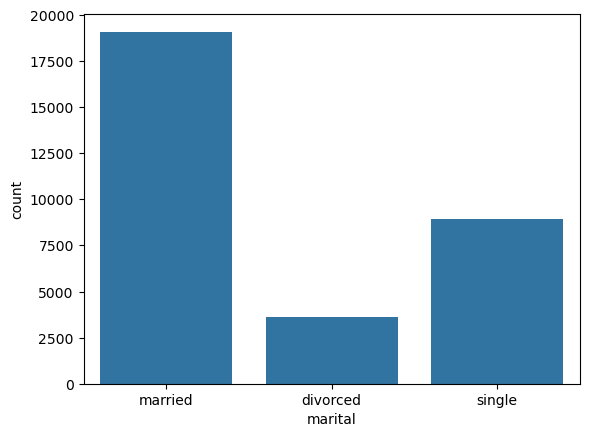

In [42]:
sns.countplot(bankdftrain,x='marital')

<Axes: xlabel='education', ylabel='count'>

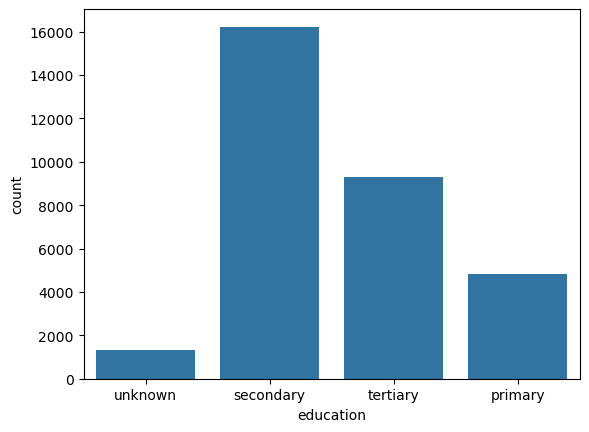

In [44]:
sns.countplot(bankdftrain,x='education')

# Categorical plot to show the relationship between default and balance for the subscribed and not subscribed customers take loan or not

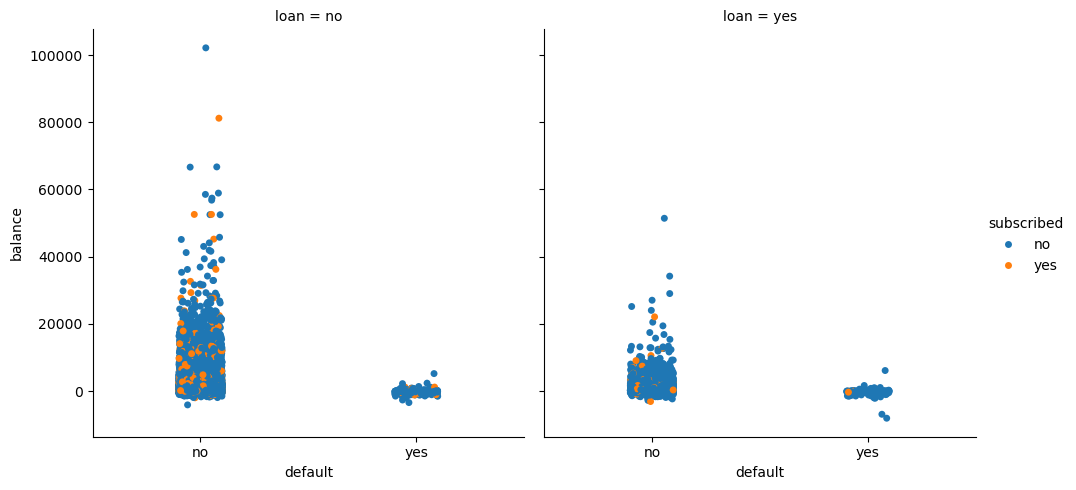

In [47]:
sns.catplot(bankdftrain,x='default',y='balance',hue='subscribed',col='loan')

# Categorical plot to show the relationship between default and balance for the subscribed and not subscribed customers take housing loan or not

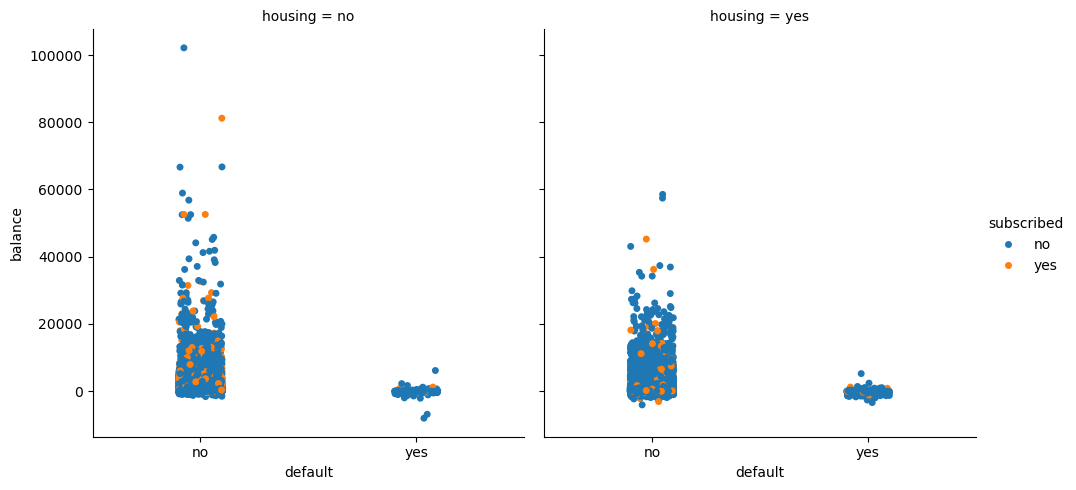

In [51]:
sns.catplot(bankdftrain,x='default',y='balance',hue='subscribed',col='housing')

# Categorical plot to show the relationship between type of communication and number of contact before the compaign

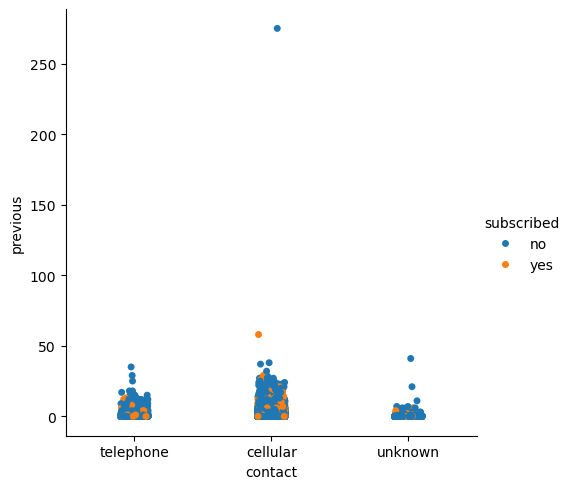

In [57]:
sns.catplot(bankdftrain,x='contact',y='previous',hue='subscribed')

# Pairplot to show the relationship between each field

<Figure size 2500x2500 with 0 Axes>

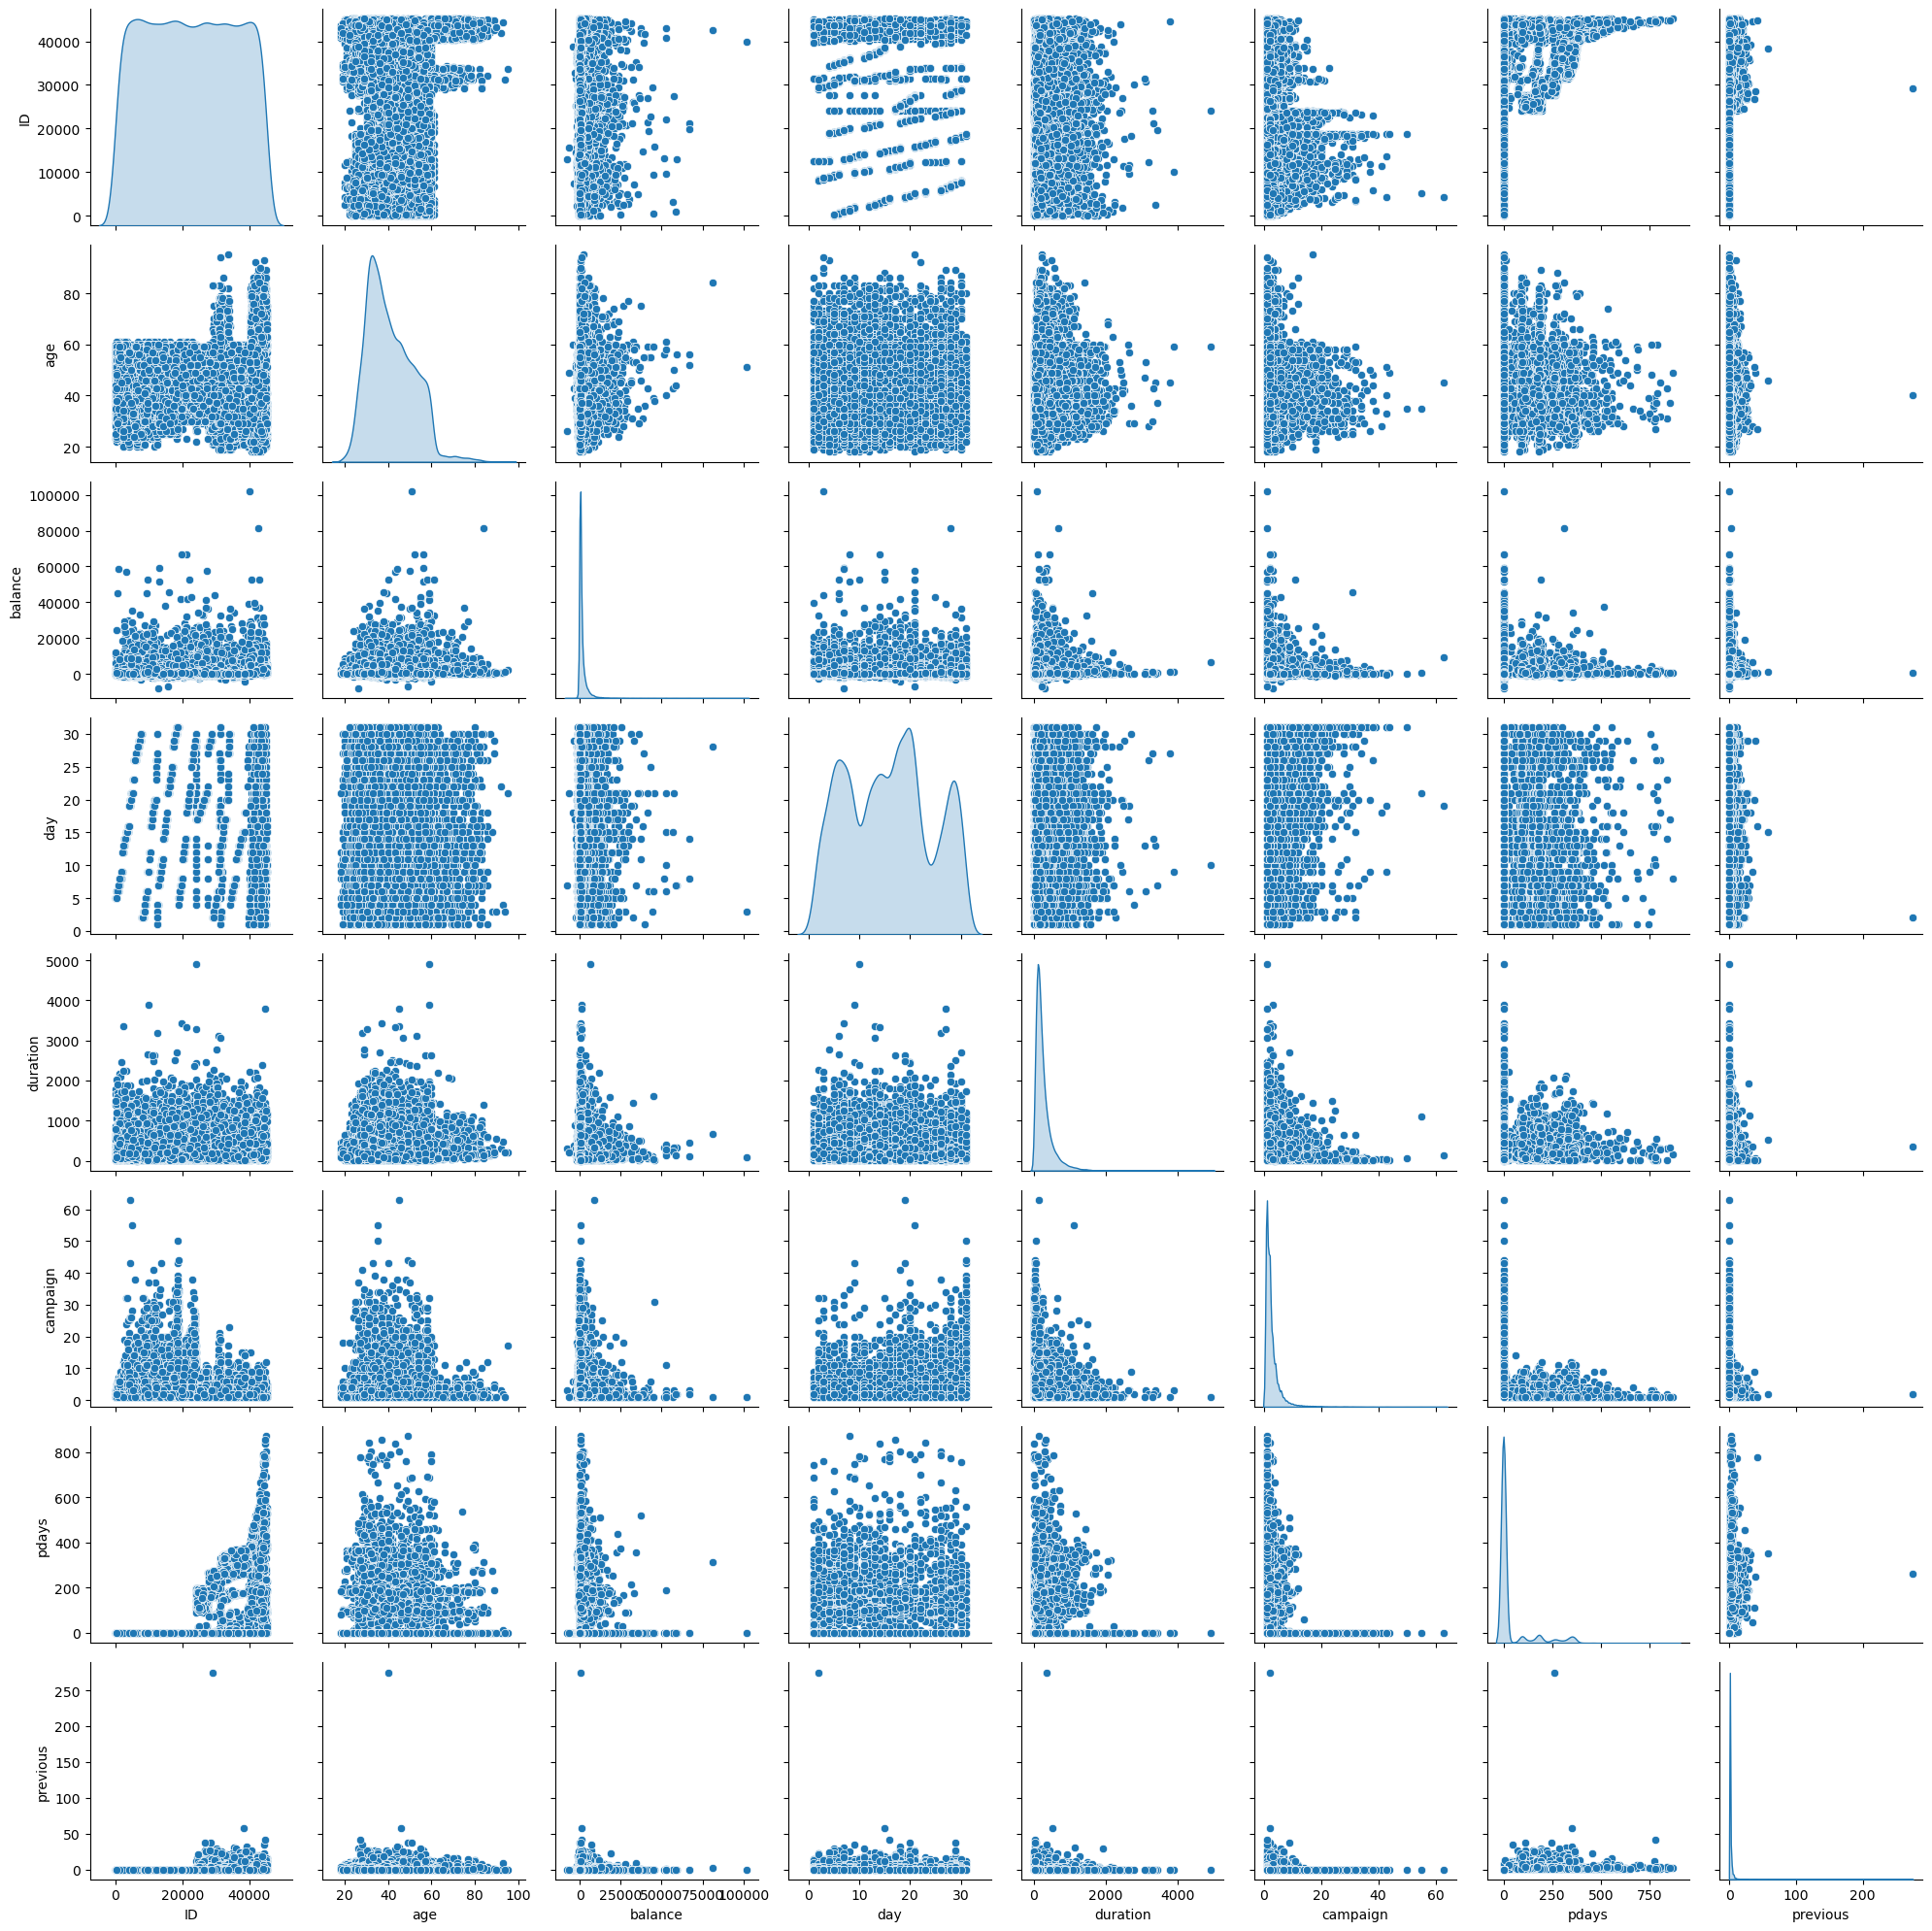

In [60]:
plt.figure(figsize=(25,25))
sns.pairplot(bankdftrain,diag_kind='kde')
plt.tight_layout()

In [62]:
x_transform=bankdftrain[['marital','education','job','default','housing','loan','contact','poutcome','subscribed']]
y_transform=bankdftrain.drop(columns=['marital','education','job','default','housing','loan','contact','poutcome','subscribed'], axis=1)
y_transform

,ID,age,balance,day,month,duration,campaign,pdays,previous
0,26110,56,1933,19,nov,44,2,-1,0
1,40576,31,3,20,jul,91,2,-1,0
2,15320,27,891,18,jul,240,1,-1,0
3,43962,57,3287,22,jun,867,1,84,3
4,29842,31,119,4,feb,380,1,-1,0
...,...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,may,116,2,-1,0
31643,40178,53,380,5,jun,438,2,-1,0
31644,19710,32,312,7,aug,37,3,-1,0
31645,38556,57,225,15,may,22,7,337,12


In [64]:
le=LabelEncoder()
bankdftraintrans=x_transform.apply(le.fit_transform)
bankdftraintrans

,marital,education,job,default,housing,loan,contact,poutcome,subscribed
0,1,3,0,0,0,0,1,3,0
1,1,1,11,0,0,0,0,3,0
2,1,1,7,0,1,0,0,3,0
3,0,2,4,0,0,0,0,2,1
4,1,1,9,0,1,0,0,3,0
...,...,...,...,...,...,...,...,...,...
31642,2,2,4,0,1,0,0,3,0
31643,0,2,4,0,0,1,0,3,1
31644,2,2,4,0,0,0,0,3,0
31645,1,1,9,0,1,0,1,0,0


In [66]:
banktraintransformdf=pd.concat([bankdftraintrans,y_transform],axis=1)

In [68]:
banktraintransformdf

,marital,education,job,default,housing,loan,contact,poutcome,subscribed,ID,age,balance,day,month,duration,campaign,pdays,previous
0,1,3,0,0,0,0,1,3,0,26110,56,1933,19,nov,44,2,-1,0
1,1,1,11,0,0,0,0,3,0,40576,31,3,20,jul,91,2,-1,0
2,1,1,7,0,1,0,0,3,0,15320,27,891,18,jul,240,1,-1,0
3,0,2,4,0,0,0,0,2,1,43962,57,3287,22,jun,867,1,84,3
4,1,1,9,0,1,0,0,3,0,29842,31,119,4,feb,380,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,2,2,4,0,1,0,0,3,0,36483,29,0,12,may,116,2,-1,0
31643,0,2,4,0,0,1,0,3,1,40178,53,380,5,jun,438,2,-1,0
31644,2,2,4,0,0,0,0,3,0,19710,32,312,7,aug,37,3,-1,0
31645,1,1,9,0,1,0,1,0,0,38556,57,225,15,may,22,7,337,12


In [70]:
banktraintransformdf['month'].unique()

array(['nov', 'jul', 'jun', 'feb', 'sep', 'jan', 'may', 'aug', 'apr',
       'oct', 'mar', 'dec'], dtype=object)

In [72]:
month_dict={"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}

In [74]:
banktraintransformdf['month']=banktraintransformdf['month'].replace(month_dict)

In [76]:
banktraintransformdf.head()

,marital,education,job,default,housing,loan,contact,poutcome,subscribed,ID,age,balance,day,month,duration,campaign,pdays,previous
0,1,3,0,0,0,0,1,3,0,26110,56,1933,19,11,44,2,-1,0
1,1,1,11,0,0,0,0,3,0,40576,31,3,20,7,91,2,-1,0
2,1,1,7,0,1,0,0,3,0,15320,27,891,18,7,240,1,-1,0
3,0,2,4,0,0,0,0,2,1,43962,57,3287,22,6,867,1,84,3
4,1,1,9,0,1,0,0,3,0,29842,31,119,4,2,380,1,-1,0


In [78]:
banktraintransformdf.describe()

,marital,education,job,default,housing,loan,contact,poutcome,subscribed,ID,age,balance,day,month,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,1.167220,1.225013,4.332923,0.018485,0.555629,0.162132,0.644642,2.566152,0.117389,22563.972162,40.957247,1363.890258,15.835466,6.146839,258.113534,2.765697,39.576042,0.574272
std,0.607186,0.749195,3.271868,0.134700,0.496904,0.368578,0.899480,0.982069,0.321888,13075.936990,10.625134,3028.304293,8.337097,2.406218,257.118973,3.113830,99.317592,2.422529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,18.000000,-8019.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,11218.000000,33.000000,73.000000,8.000000,5.000000,104.000000,1.000000,-1.000000,0.000000
50%,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,22519.000000,39.000000,450.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000
75%,2.000000,2.000000,7.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,33879.500000,48.000000,1431.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000
max,2.000000,3.000000,11.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,45211.000000,95.000000,102127.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000


In [80]:
banktraintransformdf=banktraintransformdf.drop(columns='age',axis=1)

# Heatmap to show the correlation between the features

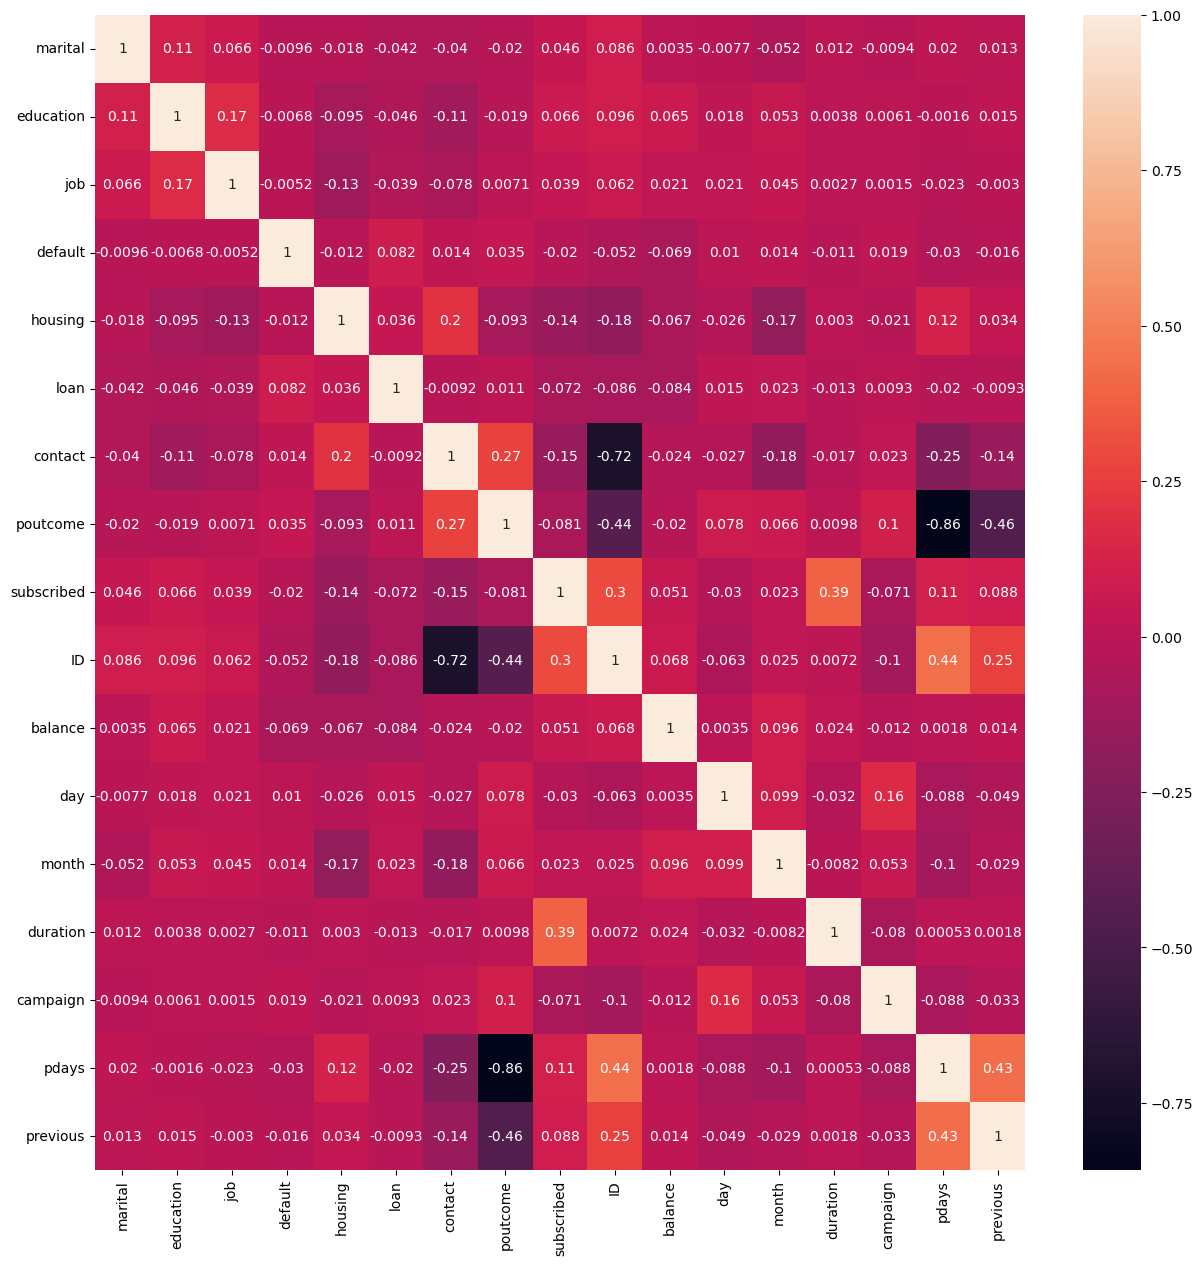

In [85]:
plt.figure(figsize=(15,15))
sns.heatmap(banktraintransformdf.corr(),annot=True)
plt.show()

# check for the skewness in the dataset using distplot

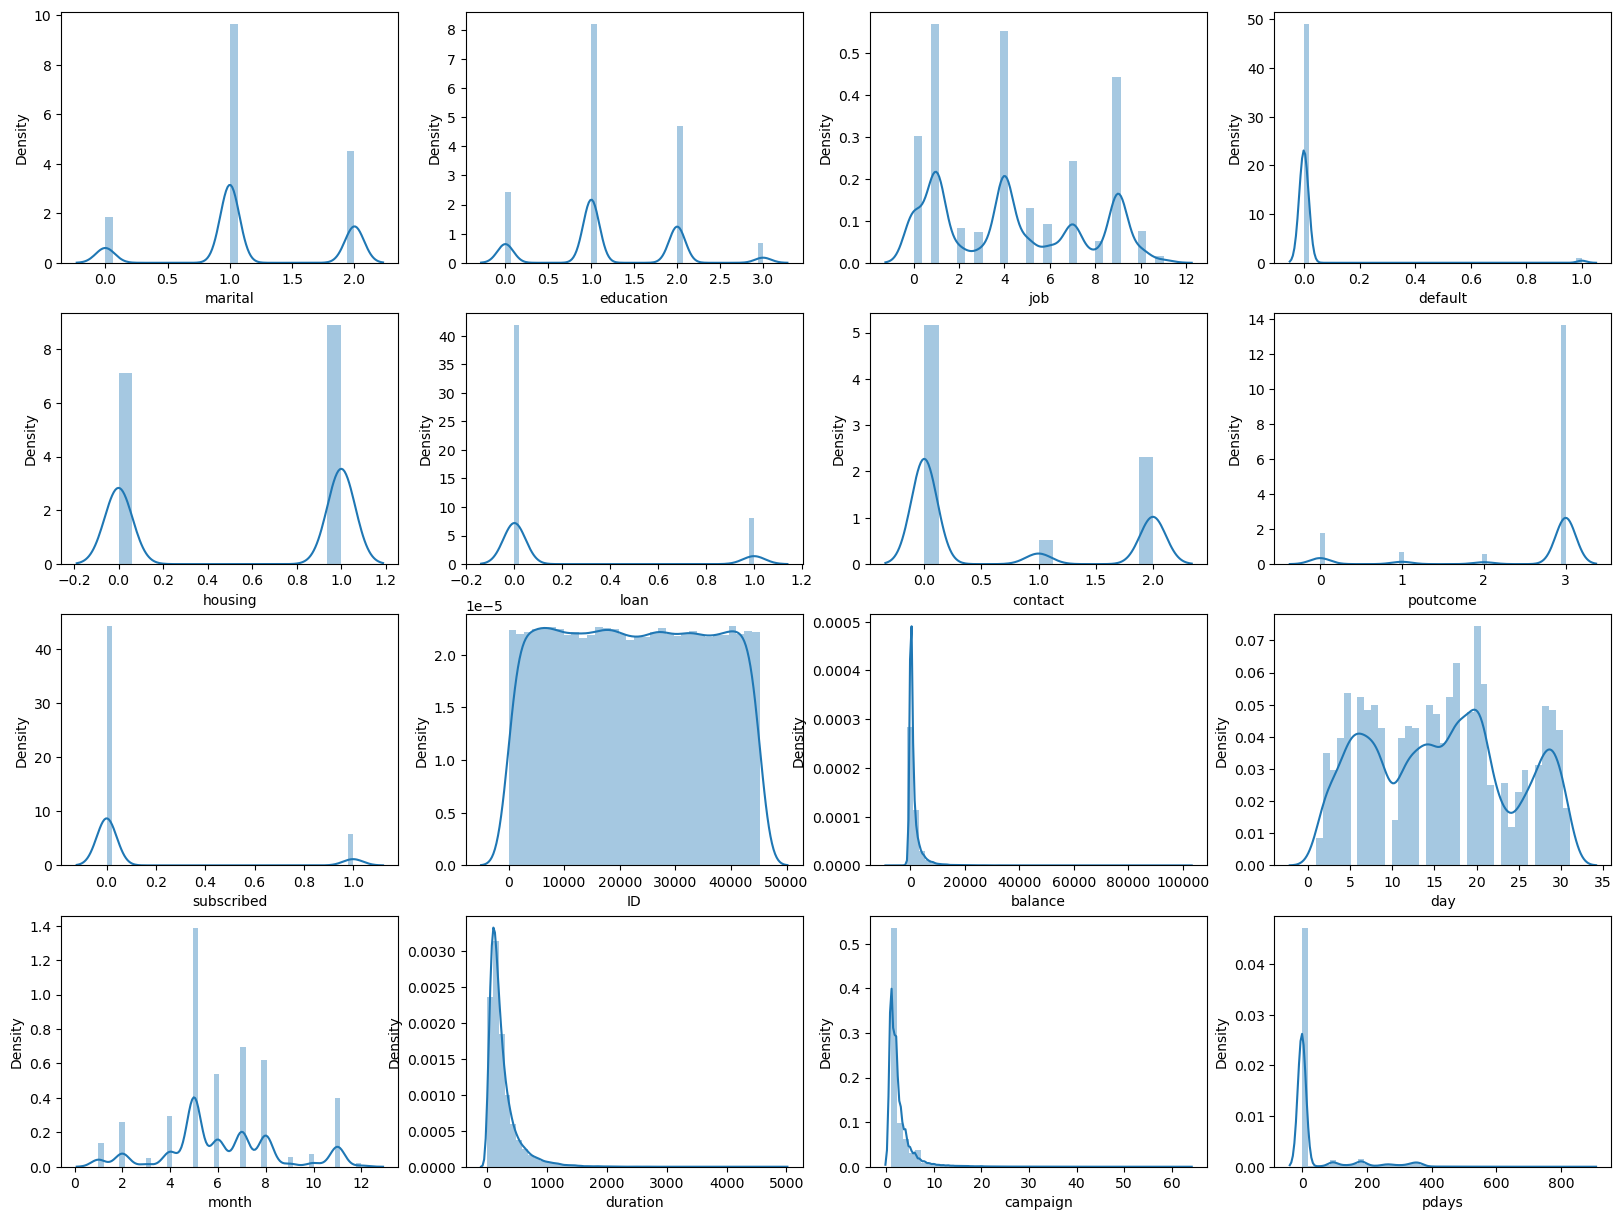

In [91]:
plt.figure(figsize=(20,15))
p=1
for i in banktraintransformdf:
    if p<=16:
        plt.subplot(4,4,p)
        sns.distplot(banktraintransformdf[i])
    p=p+1
plt.show()

# check  for  the skewness using skew() method

In [96]:
banktraintransformdf.skew()

marital       -0.100071
education      0.199441
job            0.264817
default        7.149903
housing       -0.223918
loan           1.833474
contact        0.758602
poutcome      -1.996421
subscribed     2.377445
ID             0.005851
balance        7.995696
day            0.087185
month          0.249339
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
dtype: float64

In [98]:
banktrains=banktraintransformdf.drop(columns='subscribed',axis=1)
banktrains.head()

,marital,education,job,default,housing,loan,contact,poutcome,ID,balance,day,month,duration,campaign,pdays,previous
0,1,3,0,0,0,0,1,3,26110,1933,19,11,44,2,-1,0
1,1,1,11,0,0,0,0,3,40576,3,20,7,91,2,-1,0
2,1,1,7,0,1,0,0,3,15320,891,18,7,240,1,-1,0
3,0,2,4,0,0,0,0,2,43962,3287,22,6,867,1,84,3
4,1,1,9,0,1,0,0,3,29842,119,4,2,380,1,-1,0


In [100]:
banktraintransforms=banktraintransformdf['subscribed']

In [102]:
pt=PowerTransformer()
transformedtrain=pt.fit_transform(banktrains)
banktraintransformeddf=pd.DataFrame(transformedtrain,columns=banktrains.columns)
banktraintransformeddf.head()

,marital,education,job,default,housing,loan,contact,poutcome,ID,balance,day,month,duration,campaign,pdays,previous
0,-0.285588,2.196278,-1.610040,-0.137234,-1.118201,-0.439893,1.046951,0.466993,0.350951,0.340062,0.439464,1.921472,-1.443825,0.135025,-0.469696,-0.469673
1,-0.285588,-0.253707,1.652872,-0.137234,-1.118201,-0.439893,-0.738739,0.466993,1.276585,-0.432502,0.548516,0.384328,-0.751296,0.135025,-0.469696,-0.469673
2,-0.285588,-0.253707,0.859208,-0.137234,0.894294,-0.439893,-0.738739,0.466993,-0.445731,-0.031475,0.328737,0.384328,0.290005,-1.109239,-0.469696,-0.469673
3,-1.895356,1.027984,0.095936,-0.137234,-1.118201,-0.439893,-0.738739,-1.605960,1.477866,0.776856,0.762001,-0.023413,1.895948,-1.109239,2.105039,2.177812
4,-0.285588,-0.253707,1.278928,-0.137234,0.894294,-0.439893,-0.738739,0.466993,0.601861,-0.361739,-1.515370,-1.812804,0.833299,-1.109239,-0.469696,-0.469673


In [104]:
banktraintrain_df=pd.concat([banktraintransformeddf,banktraintransforms],axis=1)
banktraintrain_df.head()

,marital,education,job,default,housing,loan,contact,poutcome,ID,balance,day,month,duration,campaign,pdays,previous,subscribed
0,-0.285588,2.196278,-1.610040,-0.137234,-1.118201,-0.439893,1.046951,0.466993,0.350951,0.340062,0.439464,1.921472,-1.443825,0.135025,-0.469696,-0.469673,0
1,-0.285588,-0.253707,1.652872,-0.137234,-1.118201,-0.439893,-0.738739,0.466993,1.276585,-0.432502,0.548516,0.384328,-0.751296,0.135025,-0.469696,-0.469673,0
2,-0.285588,-0.253707,0.859208,-0.137234,0.894294,-0.439893,-0.738739,0.466993,-0.445731,-0.031475,0.328737,0.384328,0.290005,-1.109239,-0.469696,-0.469673,0
3,-1.895356,1.027984,0.095936,-0.137234,-1.118201,-0.439893,-0.738739,-1.605960,1.477866,0.776856,0.762001,-0.023413,1.895948,-1.109239,2.105039,2.177812,1
4,-0.285588,-0.253707,1.278928,-0.137234,0.894294,-0.439893,-0.738739,0.466993,0.601861,-0.361739,-1.515370,-1.812804,0.833299,-1.109239,-0.469696,-0.469673,0


In [106]:
banktraintrain_df.isnull().sum()

marital       0
education     0
job           0
default       0
housing       0
loan          0
contact       0
poutcome      0
ID            0
balance       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
subscribed    0
dtype: int64

In [108]:
banktraintrain_df.skew()

marital      -0.050323
education    -0.039618
job          -0.145894
default       7.149903
housing      -0.223918
loan          1.833474
contact       0.627828
poutcome     -1.698601
ID           -0.290929
balance       0.821075
day          -0.159858
month         0.008294
duration      0.017331
campaign      0.230683
pdays         1.660825
previous      1.661485
subscribed    2.377445
dtype: float64

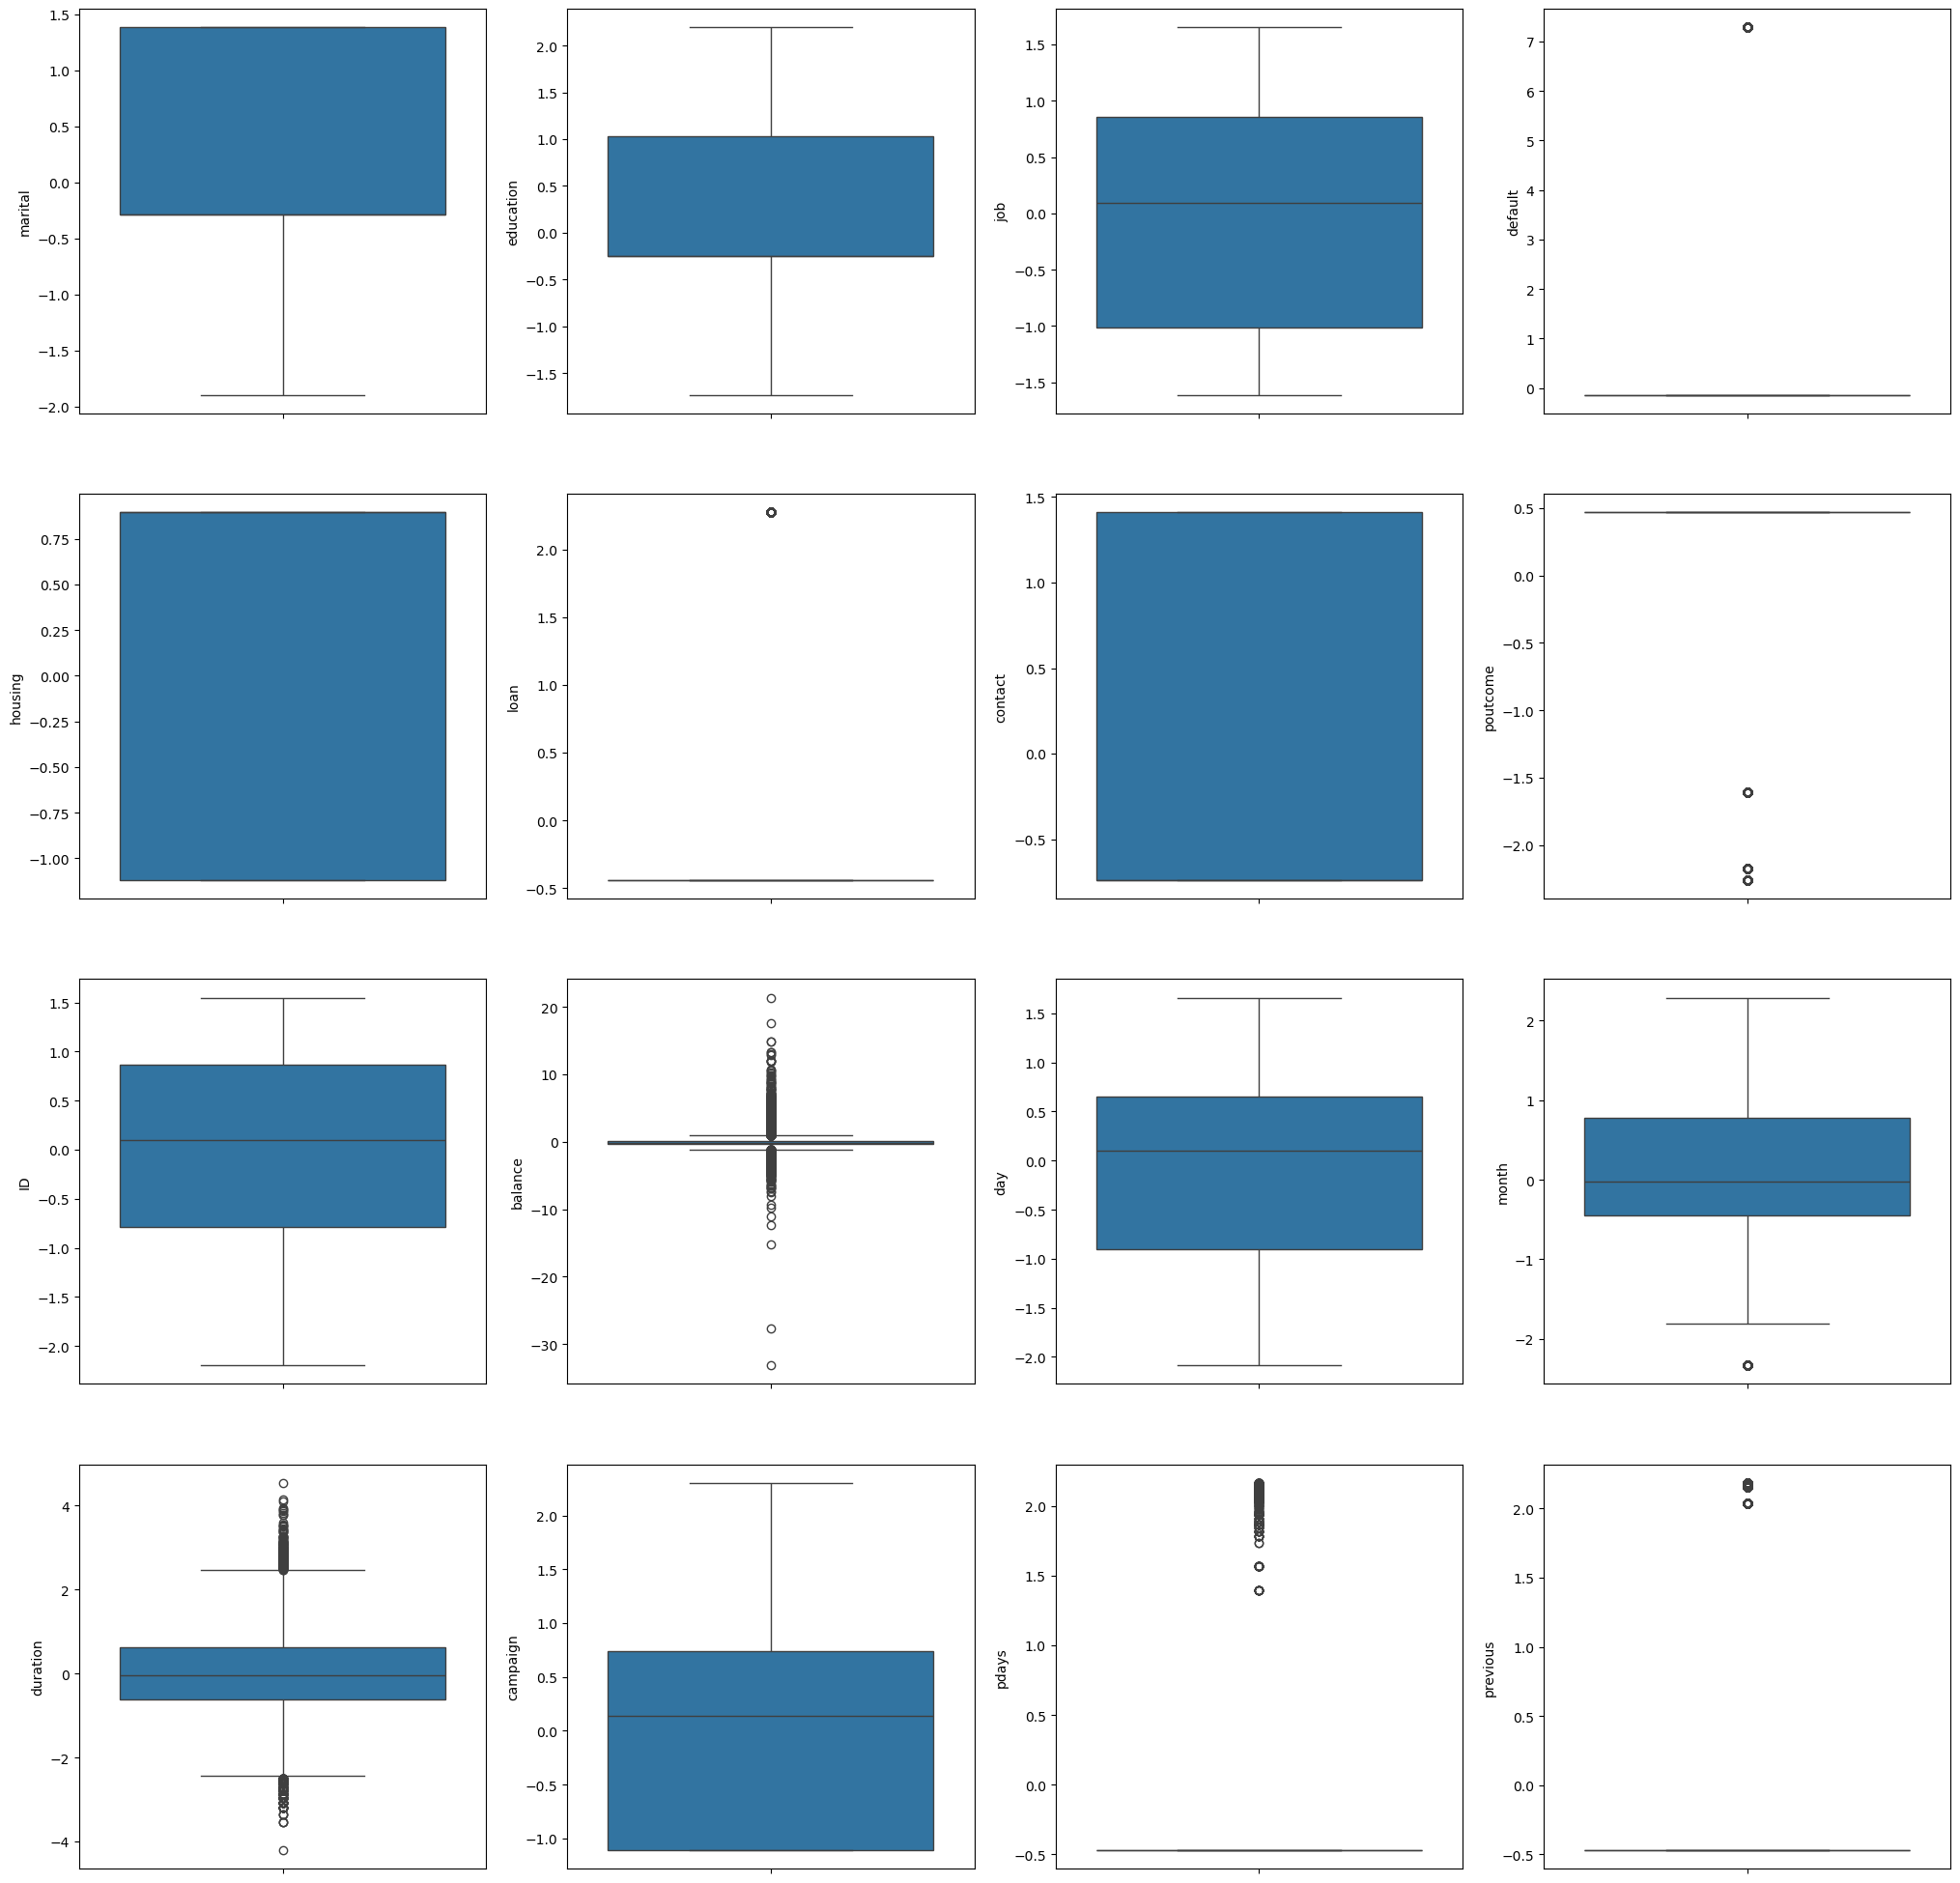

In [110]:
#check for the outliers in the dataset
plt.figure(figsize=(25,25))
p=1
for i in banktraintrain_df:
    if p<=16:
        plt.subplot(4,4,p)
        sns.boxplot(banktraintrain_df[i])
    p=p+1
plt.show()

In [112]:
#remove outliers in the dataset
z=np.abs(zscore(banktraintrain_df))
z

,marital,education,job,default,housing,loan,contact,poutcome,ID,balance,day,month,duration,campaign,pdays,previous,subscribed
0,0.285588,2.196278,1.610040,0.137234,1.118201,0.439893,1.046951,0.466993,0.350951,0.340062,0.439464,1.921472,1.443825,0.135025,0.469696,0.469673,0.364694
1,0.285588,0.253707,1.652872,0.137234,1.118201,0.439893,0.738739,0.466993,1.276585,0.432502,0.548516,0.384328,0.751296,0.135025,0.469696,0.469673,0.364694
2,0.285588,0.253707,0.859208,0.137234,0.894294,0.439893,0.738739,0.466993,0.445731,0.031475,0.328737,0.384328,0.290005,1.109239,0.469696,0.469673,0.364694
3,1.895356,1.027984,0.095936,0.137234,1.118201,0.439893,0.738739,1.605960,1.477866,0.776856,0.762001,0.023413,1.895948,1.109239,2.105039,2.177812,2.742026
4,0.285588,0.253707,1.278928,0.137234,0.894294,0.439893,0.738739,0.466993,0.601861,0.361739,1.515370,1.812804,0.833299,1.109239,0.469696,0.469673,0.364694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.382363,1.027984,0.095936,0.137234,0.894294,0.439893,0.738739,0.466993,1.026451,0.435463,0.378514,0.443697,0.503544,0.135025,0.469696,0.469673,0.364694
31643,1.895356,1.027984,0.095936,0.137234,1.118201,2.273280,0.738739,0.466993,1.252604,0.238544,1.352488,0.023413,1.008101,0.135025,0.469696,0.469673,2.742026
31644,1.382363,1.027984,0.095936,0.137234,1.118201,0.439893,0.738739,0.466993,0.106161,0.268747,1.049546,0.781411,1.598288,0.738582,0.469696,0.469673,0.364694
31645,0.285588,0.253707,1.278928,0.137234,0.894294,0.439893,1.046951,2.258711,1.154127,0.308996,0.014725,0.443697,2.037314,1.609201,2.150844,2.186083,0.364694


In [114]:
np.where(z>=3)

(array([   10,    26,   109, ..., 31614, 31618, 31646], dtype=int64),
 array([ 3,  9,  3, ...,  3,  3, 12], dtype=int64))

In [116]:
banktraint_df=banktraintrain_df[(z<=3).all(axis=1)]
banktraint_df.head()

,marital,education,job,default,housing,loan,contact,poutcome,ID,balance,day,month,duration,campaign,pdays,previous,subscribed
0,-0.285588,2.196278,-1.610040,-0.137234,-1.118201,-0.439893,1.046951,0.466993,0.350951,0.340062,0.439464,1.921472,-1.443825,0.135025,-0.469696,-0.469673,0
1,-0.285588,-0.253707,1.652872,-0.137234,-1.118201,-0.439893,-0.738739,0.466993,1.276585,-0.432502,0.548516,0.384328,-0.751296,0.135025,-0.469696,-0.469673,0
2,-0.285588,-0.253707,0.859208,-0.137234,0.894294,-0.439893,-0.738739,0.466993,-0.445731,-0.031475,0.328737,0.384328,0.290005,-1.109239,-0.469696,-0.469673,0
3,-1.895356,1.027984,0.095936,-0.137234,-1.118201,-0.439893,-0.738739,-1.605960,1.477866,0.776856,0.762001,-0.023413,1.895948,-1.109239,2.105039,2.177812,1
4,-0.285588,-0.253707,1.278928,-0.137234,0.894294,-0.439893,-0.738739,0.466993,0.601861,-0.361739,-1.515370,-1.812804,0.833299,-1.109239,-0.469696,-0.469673,0


In [118]:
banktraintrain_df.shape

(31647, 17)

In [120]:
banktraint_df.shape

(30421, 17)

In [122]:
print("Percentage of data loss",((banktraintrain_df.shape[0]-banktraint_df.shape[0])/banktraintrain_df.shape[0])*100)

Percentage of data loss 3.873984895882706


In [124]:
banktraint_df.duplicated().sum()

0

# Check for the multicollinearity in the dataset using variance_inflation_factor

In [128]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['columns']=x.columns
    vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [130]:
calc_vif(banktraint_df)

,columns,vif
0,marital,1.026493
1,education,1.076514
2,job,1.065285
3,default,1.185641
4,housing,1.143479
5,loan,1.031692
6,contact,2.222584
7,poutcome,88.013005
8,ID,2.799942
9,balance,1.047907


In [132]:
banktraint_df=banktraint_df.drop(columns='pdays',axis=1)

In [134]:
calc_vif(banktraint_df)

,columns,vif
0,marital,1.026477
1,education,1.076473
2,job,1.065229
3,default,1.185420
4,housing,1.142363
5,loan,1.031613
6,contact,2.222582
7,poutcome,82.404998
8,ID,2.799354
9,balance,1.047906


In [136]:
banktraint_df.head()

,marital,education,job,default,housing,loan,contact,poutcome,ID,balance,day,month,duration,campaign,previous,subscribed
0,-0.285588,2.196278,-1.610040,-0.137234,-1.118201,-0.439893,1.046951,0.466993,0.350951,0.340062,0.439464,1.921472,-1.443825,0.135025,-0.469673,0
1,-0.285588,-0.253707,1.652872,-0.137234,-1.118201,-0.439893,-0.738739,0.466993,1.276585,-0.432502,0.548516,0.384328,-0.751296,0.135025,-0.469673,0
2,-0.285588,-0.253707,0.859208,-0.137234,0.894294,-0.439893,-0.738739,0.466993,-0.445731,-0.031475,0.328737,0.384328,0.290005,-1.109239,-0.469673,0
3,-1.895356,1.027984,0.095936,-0.137234,-1.118201,-0.439893,-0.738739,-1.605960,1.477866,0.776856,0.762001,-0.023413,1.895948,-1.109239,2.177812,1
4,-0.285588,-0.253707,1.278928,-0.137234,0.894294,-0.439893,-0.738739,0.466993,0.601861,-0.361739,-1.515370,-1.812804,0.833299,-1.109239,-0.469673,0


# Data preprocessing for test dataset

In [180]:
bankdftest.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [182]:
x_transformtest=bankdftest[['marital','education','job','default','housing','loan','contact','poutcome']]
y_transformtest=bankdftest.drop(columns=['marital','education','job','default','housing','loan','contact','poutcome'], axis=1)
y_transformtest

,ID,age,balance,day,month,duration,campaign,pdays,previous
0,38441,32,118,15,may,20,6,-1,0
1,40403,78,2787,1,jul,372,1,-1,0
2,3709,31,144,16,may,676,1,-1,0
3,37422,57,3777,13,may,65,2,-1,0
4,12527,45,-705,3,jul,111,1,-1,0
...,...,...,...,...,...,...,...,...,...
13559,23465,39,45,28,aug,148,4,-1,0
13560,11743,54,2281,20,jun,158,1,-1,0
13561,28292,35,285,29,jan,136,1,-1,0
13562,45163,29,464,9,nov,208,2,91,3


In [184]:
le=LabelEncoder()
bankdftesttrans=x_transformtest.apply(le.fit_transform)
bankdftesttrans

,marital,education,job,default,housing,loan,contact,poutcome
0,1,1,7,0,1,0,0,3
1,0,0,5,0,0,0,1,3
2,2,2,6,0,1,0,2,3
3,2,0,7,0,1,0,1,3
4,0,1,1,0,0,1,2,3
...,...,...,...,...,...,...,...,...
13559,1,2,4,0,0,0,0,3
13560,1,0,1,0,1,0,2,3
13561,1,0,5,0,1,0,0,3
13562,2,1,0,0,0,0,0,2


In [186]:
banktesttransformdf=pd.concat([bankdftesttrans,y_transformtest],axis=1)

In [188]:
banktesttransformdf['month'].unique()

array(['may', 'jul', 'jun', 'mar', 'feb', 'sep', 'aug', 'dec', 'jan',
       'apr', 'nov', 'oct'], dtype=object)

In [190]:
month_dict={"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}

In [192]:
banktesttransformdf['month']=banktesttransformdf['month'].replace(month_dict)

In [194]:
banktesttransformdf.head()

,marital,education,job,default,housing,loan,contact,poutcome,ID,age,balance,day,month,duration,campaign,pdays,previous
0,1,1,7,0,1,0,0,3,38441,32,118,15,5,20,6,-1,0
1,0,0,5,0,0,0,1,3,40403,78,2787,1,7,372,1,-1,0
2,2,2,6,0,1,0,2,3,3709,31,144,16,5,676,1,-1,0
3,2,0,7,0,1,0,1,3,37422,57,3777,13,5,65,2,-1,0
4,0,1,1,0,0,1,2,3,12527,45,-705,3,7,111,1,-1,0


In [196]:
banktesttransformdf=banktesttransformdf.drop(columns='age',axis=1)

In [198]:
banktesttransformdf.skew()

marital     -0.109220
education    0.192137
job          0.254647
default      7.483552
housing     -0.226771
loan         1.898587
contact      0.794849
poutcome    -1.921847
ID          -0.013625
balance      9.165015
day          0.106806
month        0.227855
duration     3.017221
campaign     4.958236
pdays        2.555601
previous     8.704583
dtype: float64

In [200]:
pt=PowerTransformer()
transformedtest=pt.fit_transform(banktesttransformdf)
banktesttransformeddf=pd.DataFrame(transformedtest,columns=banktesttransformdf.columns)
banktesttransformeddf.head()

,marital,education,job,default,housing,loan,contact,poutcome,ID,balance,day,month,duration,campaign,pdays,previous
0,-0.287967,-0.256082,0.852310,-0.131336,0.893033,-0.429564,-0.726140,0.476366,1.147949,-0.349877,-0.001693,-0.441097,-2.060474,1.484674,-0.479134,-0.479073
1,-1.884603,-1.737907,0.365121,-0.131336,-1.119779,-0.429564,1.085204,0.476366,1.269686,0.636076,-2.093781,0.384487,0.802165,-1.105760,-0.479134,-0.479073
2,1.372809,1.033920,0.618588,-0.131336,0.893033,-0.429564,1.431917,0.476366,-1.568981,-0.335968,0.115298,-0.441097,1.555360,-1.105760,-0.479134,-0.479073
3,1.372809,-1.737907,0.852310,-0.131336,0.893033,-0.429564,1.085204,0.476366,1.084039,0.940270,-0.242825,-0.441097,-1.058210,0.133392,-0.479134,-0.479073
4,-1.884603,-0.256082,-1.023489,-0.131336,-1.119779,2.327941,1.431917,0.476366,-0.700164,-2.747632,-1.691501,0.384487,-0.537642,-1.105760,-0.479134,-0.479073


In [202]:
banktesttransformeddf.skew()

marital     -0.054738
education   -0.039290
job         -0.148339
default      7.483552
housing     -0.226771
loan         1.898587
contact      0.662690
poutcome    -1.648855
ID          -0.291772
balance      2.258038
day         -0.153240
month        0.004014
duration     0.019436
campaign     0.231562
pdays        1.609653
previous     1.610955
dtype: float64

In [204]:
banktesttransformeddf.isnull().sum()

marital      0
education    0
job          0
default      0
housing      0
loan         0
contact      0
poutcome     0
ID           0
balance      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
dtype: int64

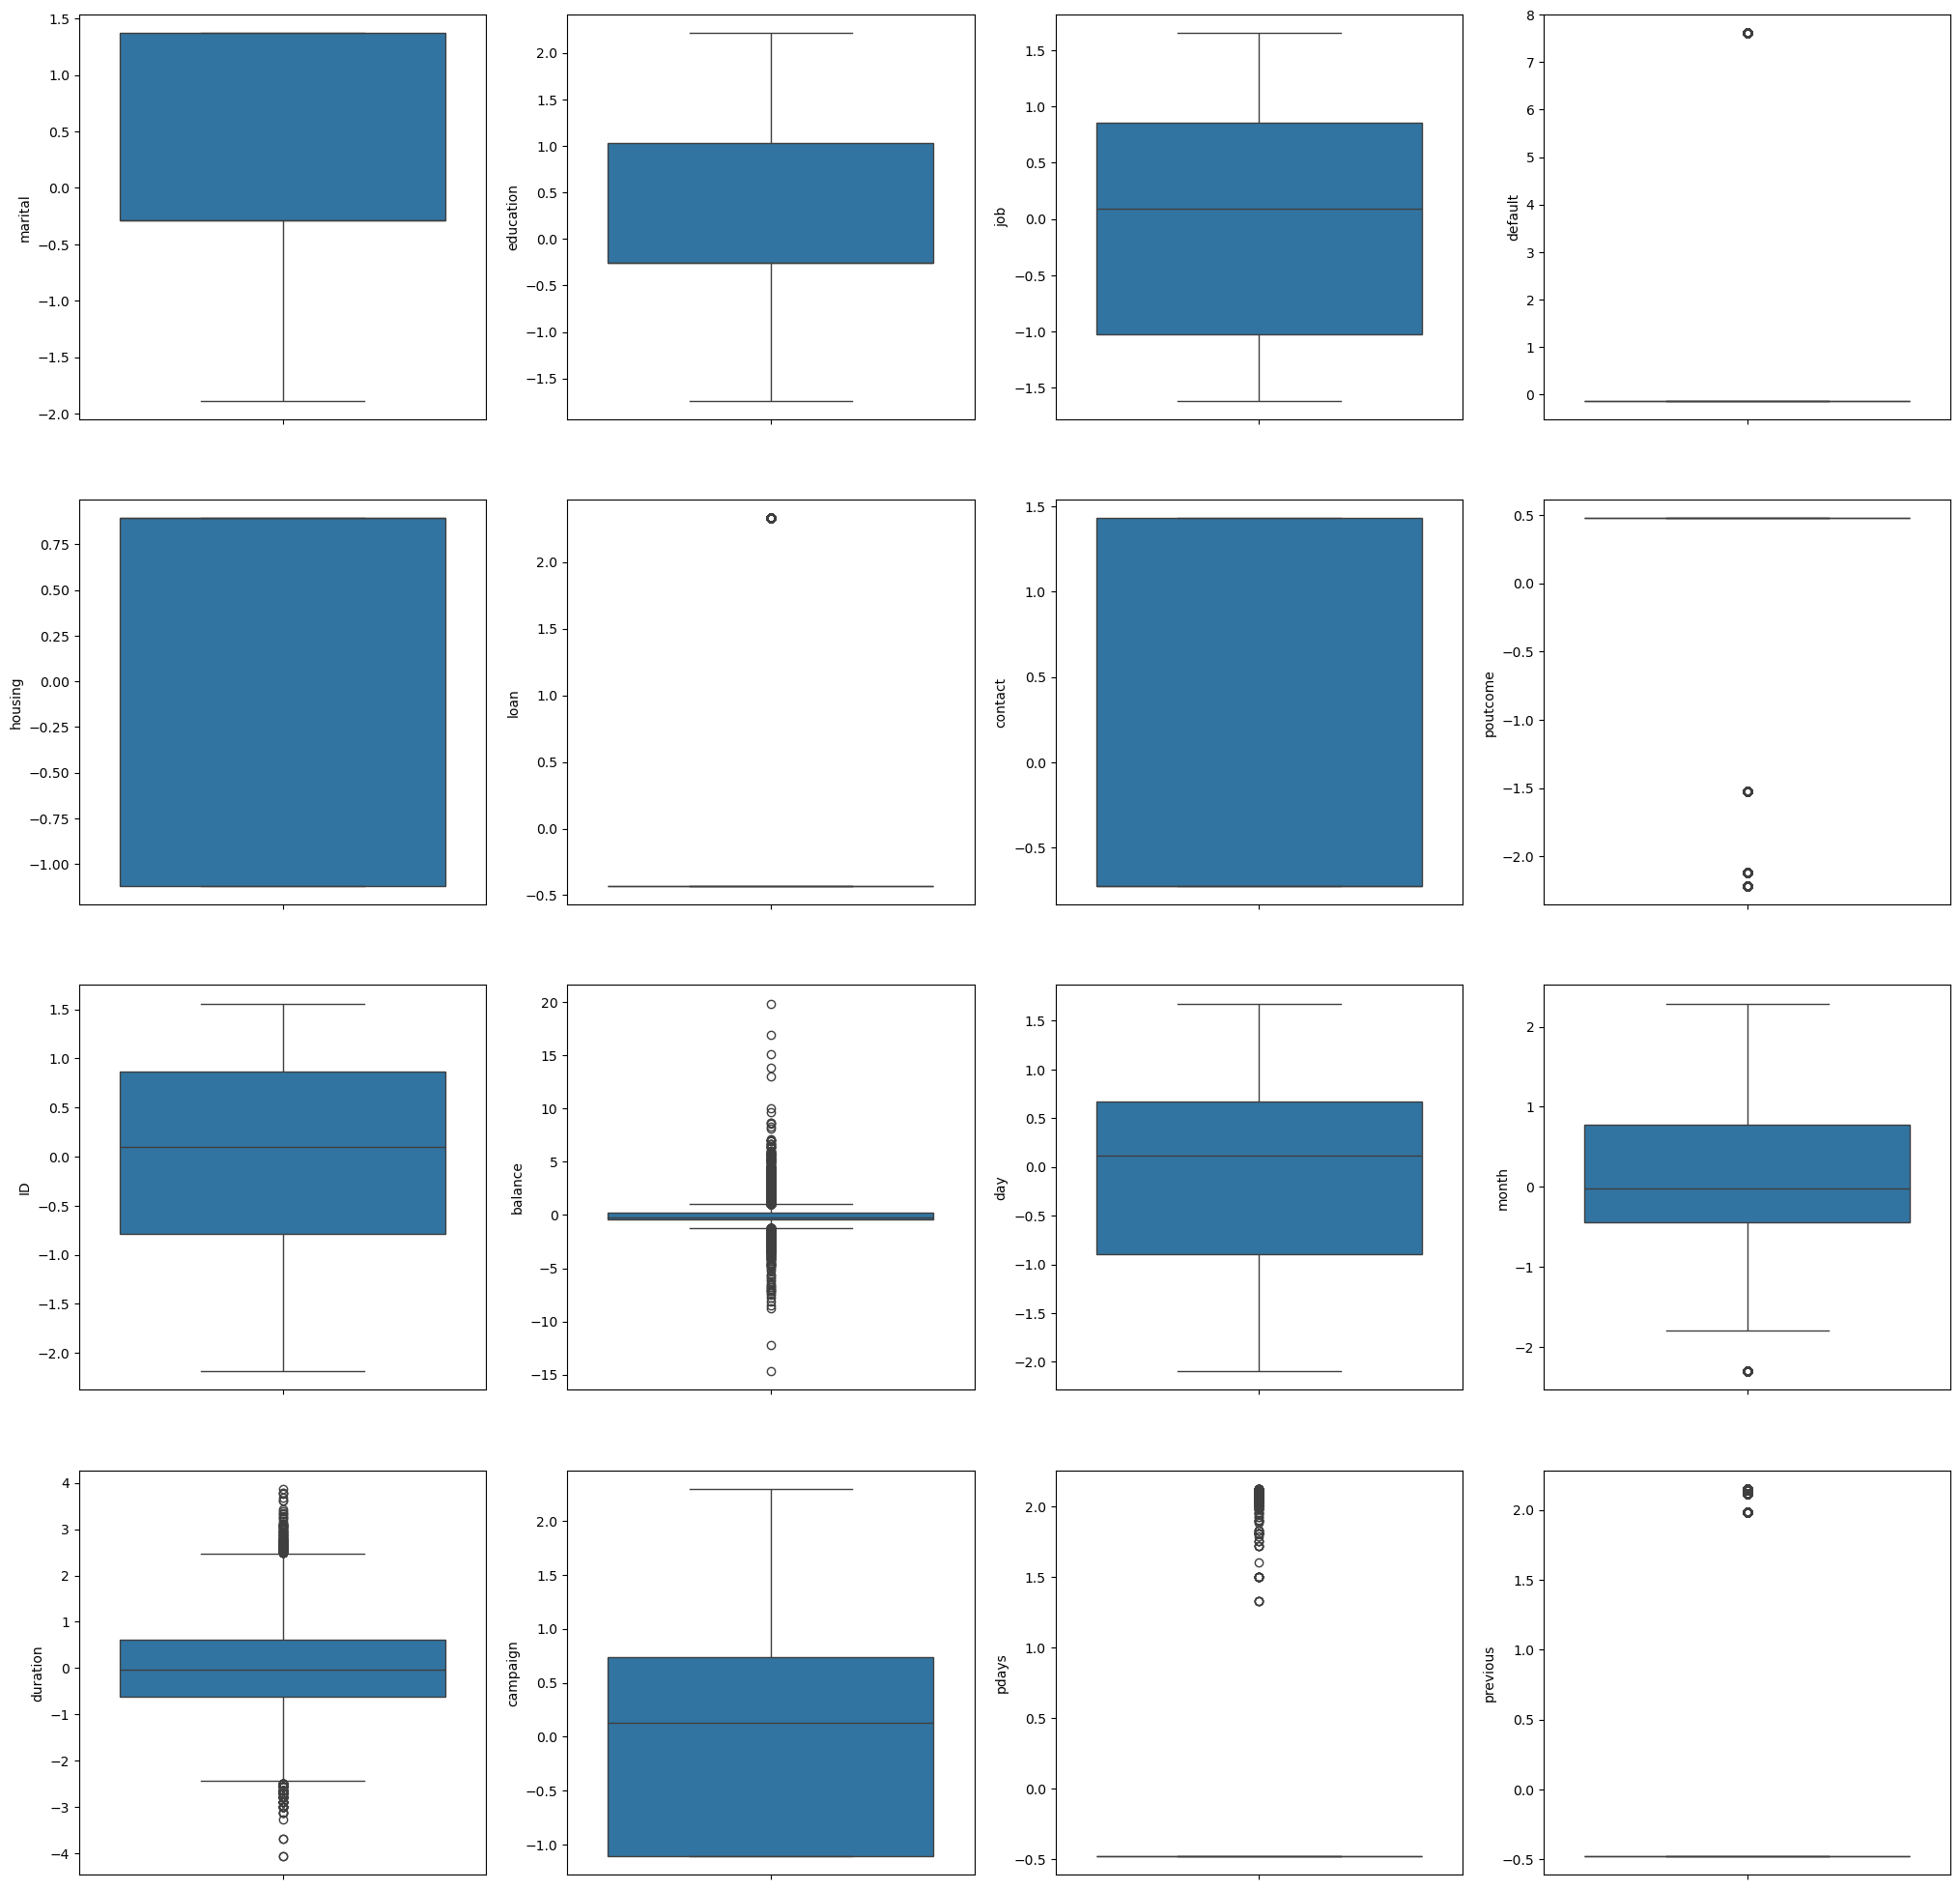

In [206]:
#check for the outliers in the dataset
plt.figure(figsize=(25,25))
p=1
for i in banktesttransformeddf:
    if p<=16:
        plt.subplot(4,4,p)
        sns.boxplot(banktesttransformeddf[i])
    p=p+1
plt.show()

In [208]:
#remove outliers in the dataset
z=np.abs(zscore(banktesttransformeddf))
z

,marital,education,job,default,housing,loan,contact,poutcome,ID,balance,day,month,duration,campaign,pdays,previous
0,0.287967,0.256082,0.852310,0.131336,0.893033,0.429564,0.726140,0.476366,1.147949,0.349877,0.001693,0.441097,2.060474,1.484674,0.479134,0.479073
1,1.884603,1.737907,0.365121,0.131336,1.119779,0.429564,1.085204,0.476366,1.269686,0.636076,2.093781,0.384487,0.802165,1.105760,0.479134,0.479073
2,1.372809,1.033920,0.618588,0.131336,0.893033,0.429564,1.431917,0.476366,1.568981,0.335968,0.115298,0.441097,1.555360,1.105760,0.479134,0.479073
3,1.372809,1.737907,0.852310,0.131336,0.893033,0.429564,1.085204,0.476366,1.084039,0.940270,0.242825,0.441097,1.058210,0.133392,0.479134,0.479073
4,1.884603,0.256082,1.023489,0.131336,1.119779,2.327941,1.431917,0.476366,0.700164,2.747632,1.691501,0.384487,0.537642,1.105760,0.479134,0.479073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,0.287967,1.033920,0.086458,0.131336,1.119779,0.429564,0.726140,0.476366,0.150065,0.392516,1.386449,0.781466,0.240061,1.089247,0.479134,0.479073
13560,0.287967,1.737907,1.023489,0.131336,0.893033,0.429564,1.431917,0.476366,0.767836,0.473571,0.563344,0.022454,0.170648,1.105760,0.479134,0.479073
13561,0.287967,1.737907,0.365121,0.131336,0.893033,0.429564,0.726140,0.476366,0.487216,0.266423,1.483967,2.303974,0.328846,1.105760,0.479134,0.479073
13562,1.372809,0.256082,1.613572,0.131336,1.119779,0.429564,0.726140,1.524143,1.558380,0.186352,0.760845,1.924443,0.128628,0.133392,2.063262,2.141219


In [210]:
np.where(z>=3)

(array([   14,    26,    28,    63,   113,   121,   149,   173,   186,
          231,   235,   287,   315,   346,   365,   369,   393,   423,
          428,   428,   431,   468,   474,   520,   548,   548,   566,
          575,   634,   634,   693,   702,   732,   753,   763,   804,
          818,   823,   938,   949,  1029,  1031,  1042,  1048,  1069,
         1075,  1086,  1119,  1250,  1257,  1261,  1269,  1316,  1330,
         1384,  1394,  1399,  1406,  1418,  1421,  1440,  1557,  1571,
         1574,  1575,  1592,  1605,  1605,  1609,  1609,  1628,  1637,
         1705,  1707,  1715,  1839,  1839,  1858,  1873,  1950,  2030,
         2038,  2055,  2056,  2071,  2133,  2137,  2202,  2203,  2256,
         2379,  2385,  2419,  2440,  2446,  2448,  2503,  2514,  2523,
         2532,  2532,  2633,  2653,  2659,  2687,  2705,  2720,  2727,
         2765,  2766,  2769,  2812,  2845,  2845,  2941,  2997,  2997,
         3047,  3080,  3083,  3088,  3127,  3132,  3180,  3192,  3196,
      

In [212]:
banktesttransformed=banktesttransformeddf[(z<=3).all(axis=1)]
banktesttransformed

,marital,education,job,default,housing,loan,contact,poutcome,ID,balance,day,month,duration,campaign,pdays,previous
0,-0.287967,-0.256082,0.852310,-0.131336,0.893033,-0.429564,-0.726140,0.476366,1.147949,-0.349877,-0.001693,-0.441097,-2.060474,1.484674,-0.479134,-0.479073
1,-1.884603,-1.737907,0.365121,-0.131336,-1.119779,-0.429564,1.085204,0.476366,1.269686,0.636076,-2.093781,0.384487,0.802165,-1.105760,-0.479134,-0.479073
2,1.372809,1.033920,0.618588,-0.131336,0.893033,-0.429564,1.431917,0.476366,-1.568981,-0.335968,0.115298,-0.441097,1.555360,-1.105760,-0.479134,-0.479073
3,1.372809,-1.737907,0.852310,-0.131336,0.893033,-0.429564,1.085204,0.476366,1.084039,0.940270,-0.242825,-0.441097,-1.058210,0.133392,-0.479134,-0.479073
4,-1.884603,-0.256082,-1.023489,-0.131336,-1.119779,2.327941,1.431917,0.476366,-0.700164,-2.747632,-1.691501,0.384487,-0.537642,-1.105760,-0.479134,-0.479073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.287967,1.033920,0.086458,-0.131336,-1.119779,-0.429564,-0.726140,0.476366,0.150065,-0.392516,1.386449,0.781466,-0.240061,1.089247,-0.479134,-0.479073
13560,-0.287967,-1.737907,-1.023489,-0.131336,0.893033,-0.429564,1.431917,0.476366,-0.767836,0.473571,0.563344,-0.022454,-0.170648,-1.105760,-0.479134,-0.479073
13561,-0.287967,-1.737907,0.365121,-0.131336,0.893033,-0.429564,-0.726140,0.476366,0.487216,-0.266423,1.483967,-2.303974,-0.328846,-1.105760,-0.479134,-0.479073
13562,1.372809,-0.256082,-1.613572,-0.131336,-1.119779,-0.429564,-0.726140,-1.524143,1.558380,-0.186352,-0.760845,1.924443,0.128628,0.133392,2.063262,2.141219


In [214]:
print("Percentage of data loss",((banktesttransformeddf.shape[0]-banktesttransformed.shape[0])/banktesttransformeddf.shape[0])*100)

Percentage of data loss 3.796815098790917


In [216]:
banktesttransformed.shape

(13049, 16)

In [218]:
banktesttransformeddf.shape

(13564, 16)

In [220]:
banktesttransformed.duplicated().sum()

0

In [222]:
banktesttransformed=banktesttransformed.drop(columns='pdays',axis=1)

In [224]:
banktesttransformed.shape

(13049, 15)

In [226]:
#Standardize the test dataset using StandardScaler

sc1= StandardScaler()
x_scaled_test=sc1.fit_transform(banktesttransformed)
x_scaleddftest=pd.DataFrame(x_scaled_test,columns=banktesttransformed.columns)
x_scaleddftest.head()

,marital,education,job,default,housing,loan,contact,poutcome,ID,balance,day,month,duration,campaign,previous
0,-0.289904,-0.253229,0.851733,2.775558e-17,0.892686,-0.424072,-0.725098,0.480475,1.141636,-0.487702,-0.000435,-0.434108,-2.084261,1.487570,-0.483201
1,-1.888378,-1.735331,0.365157,2.775558e-17,-1.120215,-0.424072,1.087120,0.480475,1.263091,0.990658,-2.091453,0.392126,0.816150,-1.104708,-0.483201
2,1.372785,1.037015,0.618304,2.775558e-17,0.892686,-0.424072,1.434001,0.480475,-1.569026,-0.466847,0.116497,-0.434108,1.579284,-1.104708,-0.483201
3,1.372785,-1.735331,0.851733,2.775558e-17,0.892686,-0.424072,1.087120,0.480475,1.077873,1.446772,-0.241443,-0.434108,-1.068772,0.135326,-0.483201
4,-1.888378,-0.253229,-1.021705,2.775558e-17,-1.120215,2.358089,1.434001,0.480475,-0.702213,-4.082951,-1.689379,0.392126,-0.541335,-1.104708,-0.483201


In [228]:
x=banktraint_df.drop(columns='subscribed',axis=1)
x.head()

,marital,education,job,default,housing,loan,contact,poutcome,ID,balance,day,month,duration,campaign,previous
0,-0.285588,2.196278,-1.610040,-0.137234,-1.118201,-0.439893,1.046951,0.466993,0.350951,0.340062,0.439464,1.921472,-1.443825,0.135025,-0.469673
1,-0.285588,-0.253707,1.652872,-0.137234,-1.118201,-0.439893,-0.738739,0.466993,1.276585,-0.432502,0.548516,0.384328,-0.751296,0.135025,-0.469673
2,-0.285588,-0.253707,0.859208,-0.137234,0.894294,-0.439893,-0.738739,0.466993,-0.445731,-0.031475,0.328737,0.384328,0.290005,-1.109239,-0.469673
3,-1.895356,1.027984,0.095936,-0.137234,-1.118201,-0.439893,-0.738739,-1.605960,1.477866,0.776856,0.762001,-0.023413,1.895948,-1.109239,2.177812
4,-0.285588,-0.253707,1.278928,-0.137234,0.894294,-0.439893,-0.738739,0.466993,0.601861,-0.361739,-1.515370,-1.812804,0.833299,-1.109239,-0.469673


In [230]:
y=banktraint_df['subscribed']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: subscribed, dtype: int32

In [232]:
y.value_counts()

subscribed
0    26842
1     3579
Name: count, dtype: int64

# Balance the dataset using SMOTE over sampling technique

In [234]:
st=SMOTE()
x_balanced,y_balanced=st.fit_resample(x,y)

In [239]:
y_balanced.value_counts()

subscribed
0    26842
1    26842
Name: count, dtype: int64

In [241]:
#Standardize the dataset using StandardScaler

sc= StandardScaler()
x_scaled=sc.fit_transform(x_balanced)
x_scaleddf=pd.DataFrame(x_scaled,columns=x_balanced.columns)
x_scaleddf.head()

,marital,education,job,default,housing,loan,contact,poutcome,ID,balance,day,month,duration,campaign,previous
0,-0.346805,2.190771,-1.706302,-5.551115e-17,-0.944586,-0.382355,1.348888,0.592356,0.012809,0.514221,0.488520,1.839562,-1.805162,0.255390,-0.597708
1,-0.346805,-0.339177,1.648846,-5.551115e-17,-0.944586,-0.382355,-0.604893,0.592356,0.929391,-0.719788,0.599001,0.355616,-1.132271,0.255390,-0.597708
2,-0.346805,-0.339177,0.832747,-5.551115e-17,1.061988,-0.382355,-0.604893,0.592356,-0.776081,-0.079231,0.376344,0.355616,-0.120497,-1.042604,-0.597708
3,-1.938804,0.984346,0.047898,-5.551115e-17,-0.944586,-0.382355,-0.604893,-1.309928,1.128703,1.211909,0.815282,-0.038014,1.439906,-1.042604,1.713148
4,-0.346805,-0.339177,1.264331,-5.551115e-17,1.061988,-0.382355,-0.604893,0.592356,0.261266,-0.606758,-1.491912,-1.765477,0.407391,-1.042604,-0.597708


In [243]:
x_scaleddf.shape

(53684, 15)

# Instantiate the classifier models

In [246]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
bag=BaggingClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()
extra=ExtraTreesClassifier()

# Model selection using cross validation score

In [249]:
models=[lr,dtc,svc,knn,rfc,bag,gbc,ada,extra]

for i in models:
    cvs=cross_val_score(i,x_scaleddf,y_balanced,scoring='accuracy',cv=5,n_jobs=-1)
    print("Cross validation score for",i,"is",cvs,"\n mean of the cross validation is",np.mean(cvs))

Cross validation score for LogisticRegression() is [0.84036509 0.85042377 0.84586011 0.85340412 0.85134128] 
 mean of the cross validation is 0.8482788738247494
Cross validation score for DecisionTreeClassifier() is [0.83542889 0.92744715 0.92744715 0.92968241 0.93209762] 
 mean of the cross validation is 0.910420640730474
Cross validation score for SVC() is [0.89270746 0.90621216 0.90211418 0.90462885 0.90629657] 
 mean of the cross validation is 0.9023918468207558
Cross validation score for KNeighborsClassifier() is [0.91291795 0.92055509 0.91571202 0.92074136 0.91691505] 
 mean of the cross validation is 0.9173682949623203
Cross validation score for RandomForestClassifier() is [0.90667784 0.95641241 0.956133   0.95836826 0.95566319] 
 mean of the cross validation is 0.9466509390554021
Cross validation score for BaggingClassifier() is [0.8650461  0.94905467 0.94626059 0.94979976 0.94932936] 
 mean of the cross validation is 0.9318980968493837
Cross validation score for GradientBoosti

In [251]:
x_train,x_test,y_train,y_test=train_test_split(x_scaleddf,y_balanced,test_size=0.30,random_state=2)

In [253]:
x_train.shape

(37578, 15)

In [255]:
x_test.shape

(16106, 15)

In [257]:
y_train.shape

(37578,)

In [259]:
y_test.shape

(16106,)

In [263]:
for i in  models:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    y_pred_train=i.predict(x_train)
    print("Performance metrics for",i)
    print("R-Score:",r2_score(y_test,y_pred))
    print("Score for training data",accuracy_score(y_train,y_pred_train))
    print("Accuracy score",accuracy_score(y_test,y_pred))
    print("Precision Score",precision_score(y_test,y_pred))
    print("Recall score",recall_score(y_test,y_pred))
    print("Confusion matrix",confusion_matrix(y_test,y_pred),"\n")

Performance metrics for LogisticRegression()
R-Score: 0.3907661639379534
Score for training data 0.8482888924370643
Accuracy score 0.8476965106171613
Precision Score 0.8375179340028694
Recall score 0.864921595258674
Confusion matrix [[6648 1359]
 [1094 7005]] 

Performance metrics for DecisionTreeClassifier()
R-Score: 0.6557692226734624
Score for training data 1.0
Accuracy score 0.9139451136222526
Precision Score 0.9093791925844615
Recall score 0.9206074824052353
Confusion matrix [[7264  743]
 [ 643 7456]] 

Performance metrics for SVC()
R-Score: 0.6073384856037115
Score for training data 0.9080579062217254
Accuracy score 0.9018378244132621
Precision Score 0.8665916760404949
Recall score 0.9512285467341647
Confusion matrix [[6821 1186]
 [ 395 7704]] 

Performance metrics for KNeighborsClassifier()
R-Score: 0.6634684680537819
Score for training data 0.9354675608068551
Accuracy score 0.915869862163169
Precision Score 0.8637540453074434
Recall score 0.9886405729102359
Confusion matrix [[6

In [200]:
extra.fit(x_train,y_train)
y_pred=extra.predict(x_test)
y_pred_train=extra.score(x_train,y_train)
print("R-Score:",r2_score(y_test,y_pred))
print("Score for training data",y_pred_train)
print("Accuracy score",accuracy_score(y_test,y_pred))
print("Precision Score",precision_score(y_test,y_pred))
print("Recall score",recall_score(y_test,y_pred))
print("Confusion matrix",confusion_matrix(y_test,y_pred))

R-Score: 0.8422896510805546
Score for training data 1.0
Accuracy score 0.9605736992425183
Precision Score 0.9383368569415081
Recall score 0.9864180763057168
Confusion matrix [[7482  525]
 [ 110 7989]]


# Hyperparameter tuning for Extra Trees Classifier

In [270]:
param_grids={"criterion" : ["gini", "entropy", "log_loss"], "max_features" : ["sqrt", "log2", None],"bootstrap":[True,False],"oob_score":[True,False],"class_weight" : ["balanced", "balanced_subsample"]}

In [272]:
param_grids

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_features': ['sqrt', 'log2', None],
 'bootstrap': [True, False],
 'oob_score': [True, False],
 'class_weight': ['balanced', 'balanced_subsample']}

In [274]:
gscv=GridSearchCV(extra,param_grid=param_grids,scoring='accuracy',cv=5,n_jobs=-1)

In [276]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'oob_score': [True, False]},
             scoring='accuracy')

In [278]:
gscv.best_params_

{'bootstrap': False,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_features': 'log2',
 'oob_score': False}

In [280]:
extra1=ExtraTreesClassifier(criterion='gini',max_features='log2',bootstrap=False,class_weight='balanced',oob_score=False)

In [282]:
extra1.fit(x_train,y_train)
y_pred_extra=extra1.predict(x_test)
y_pred_extra

array([0, 1, 1, ..., 1, 1, 1])

In [284]:
print("Accuracy score",accuracy_score(y_test,y_pred_extra))

Accuracy score 0.9607599652303489


In [286]:
y_predict=extra1.predict_proba(x_test)[:,1]
y_predict

array([0.  , 1.  , 0.99, ..., 0.93, 1.  , 0.84])

In [314]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_extra)

In [316]:
fpr

array([0.        , 0.06619208, 1.        ])

In [318]:
tpr

array([0.        , 0.98740585, 1.        ])

In [320]:
threshold

array([inf,  1.,  0.])

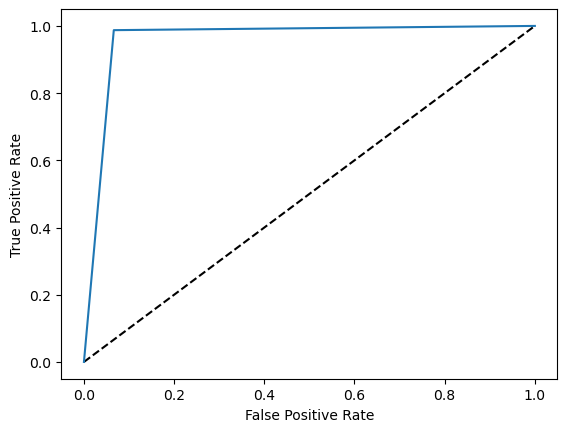

In [322]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="ExtraTreeClassifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [324]:
auc_score=roc_auc_score(y_test,y_pred_extra)
auc_score

0.9606068853230395

In [300]:
# Predict the output on the test data
x_scaleddftest.head()

,marital,education,job,default,housing,loan,contact,poutcome,ID,balance,day,month,duration,campaign,previous
0,-0.289904,-0.253229,0.851733,2.775558e-17,0.892686,-0.424072,-0.725098,0.480475,1.141636,-0.487702,-0.000435,-0.434108,-2.084261,1.487570,-0.483201
1,-1.888378,-1.735331,0.365157,2.775558e-17,-1.120215,-0.424072,1.087120,0.480475,1.263091,0.990658,-2.091453,0.392126,0.816150,-1.104708,-0.483201
2,1.372785,1.037015,0.618304,2.775558e-17,0.892686,-0.424072,1.434001,0.480475,-1.569026,-0.466847,0.116497,-0.434108,1.579284,-1.104708,-0.483201
3,1.372785,-1.735331,0.851733,2.775558e-17,0.892686,-0.424072,1.087120,0.480475,1.077873,1.446772,-0.241443,-0.434108,-1.068772,0.135326,-0.483201
4,-1.888378,-0.253229,-1.021705,2.775558e-17,-1.120215,2.358089,1.434001,0.480475,-0.702213,-4.082951,-1.689379,0.392126,-0.541335,-1.104708,-0.483201


In [302]:
y_predict_test=extra.predict(x_scaleddftest)
y_predict_test

array([0, 1, 1, ..., 1, 1, 1])

In [304]:
#saving the best model

import pickle

file='BankMarketing.pkl'
pickle.dump(extra1,open(file,'wb'))

In [306]:
# Load the model

import pickle

model=pickle.load(open('BankMarketing.pkl','rb'))
predout=model.predict(x_scaleddftest)
predout

array([0, 1, 1, ..., 1, 1, 1])

In [310]:
df=pd.DataFrame()
df['Actual Output']=y_test
df['Predicted Output']=y_pred_extra
df

,Actual Output,Predicted Output
19841,0,0
36826,1,1
48144,1,1
43400,1,1
31642,1,1
...,...,...
34921,1,1
25,0,0
48714,1,1
46461,1,1
